In [1748]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mp
import seaborn as sns
import numpy as np
import datetime

In [1749]:
TV_df = pd.read_csv("data_TV.csv")

##### Filling all nulls with 'Unknown'

In [1750]:
TV_df.overview = TV_df.overview.fillna('Unknown')

In [1751]:
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
dtype: object

#### How many shows are there per origin_country for the top 10, collabrative and individually.

In [1752]:
TV_df['origin_country'].value_counts().sort_values(ascending= False).head(10)

US               1377
JP                393
GB                169
MX                148
KR                 98
CO                 55
ES                 49
CA                 39
c("CA", "US")      24
character(0)       23
Name: origin_country, dtype: int64

##### Singling out individual countries to see how they preform alone.

In [1753]:
TV_df["countryLen"]= TV_df["origin_country"].str.len()
count_three = TV_df["countryLen"] == 2
TV_df['origin_country'] = TV_df[TV_df.countryLen == 2]["origin_country"]


#### 1 How many shows are there per origin_country for the top 15 Individually.

In [1754]:
top = TV_df['origin_country'].value_counts().sort_values(ascending= False).head(15)
top

US    1377
JP     393
GB     169
MX     148
KR      98
CO      55
ES      49
CA      39
TR      20
BR      20
FR      19
IT      13
AR      11
DE      11
CN      10
Name: origin_country, dtype: int64

##### #Created a filtered dataframe with only the top 15 individual countries.

In [1755]:
top_15 = TV_df.groupby('origin_country').agg({'origin_country':'count'}).rename(columns = {'origin_country':'number_of_shows'}).sort_values(by = 'number_of_shows', ascending = False).head(15).reset_index()
top_15

,origin_country,number_of_shows
0,US,1377
1,JP,393
2,GB,169
3,MX,148
4,KR,98
5,CO,55
6,ES,49
7,CA,39
8,BR,20
9,TR,20


#### 1 Barchart That Shows The Number of Shows Produced by The Top 15 Countries.

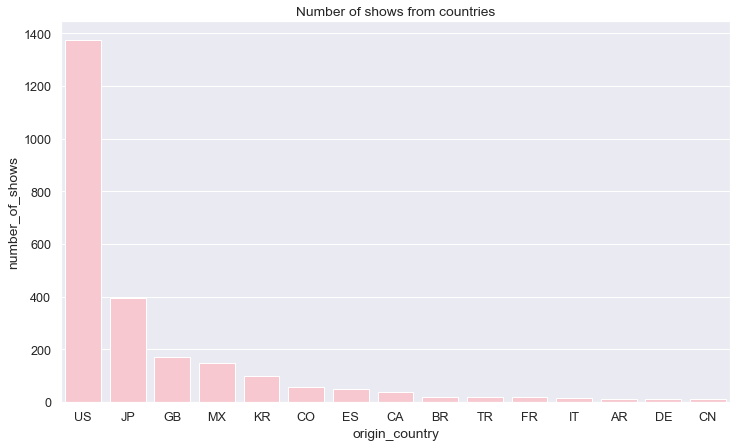

In [1756]:
plt.title('Number of shows from countries')


top_15_graph = sns.barplot(data = top_15, x = 'origin_country', y = 'number_of_shows', color = 'pink') 

##### #Creating a Year Column That;
###### Eliminates The Values That have 'Unknown' dates,
###### Makes The Column Into a String,
###### Only Includes The First Four Numbers(The numbers for year),
###### Makes The Column Into a String,


In [1757]:
TV_df['Year'] = TV_df[TV_df.first_air_date != 'Unkown']['first_air_date'].dropna().astype(str).str[0:4] 
print(TV_df['Year'])

0       2021
1       2008
2       2021
3       2013
4       2022
        ... 
2612    2002
2613    2000
2614    1997
2615    1985
2616    2006
Name: Year, Length: 2617, dtype: object


##### #Making Year Column a Float

In [1758]:
TV_df.Year = TV_df.Year.astype(float)
TV_df.dtypes

first_air_date        object
origin_country        object
original_language     object
name                  object
popularity           float64
vote_average         float64
vote_count             int64
overview              object
countryLen             int64
Year                 float64
dtype: object

#### 2 A scatter plot of movies produced by the top 15 countries for each year from 1962 to 2021.

Text(0.5, 1.0, 'Number of Shows Produced by The Top 15 Countries per Year')

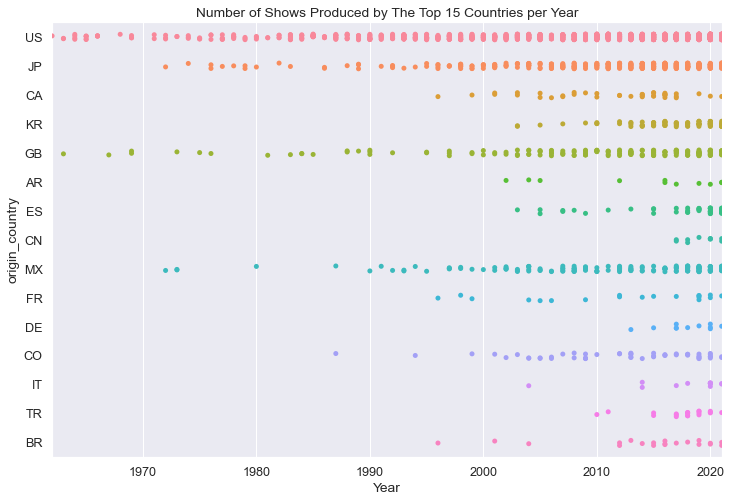

In [1759]:
plt.figure(figsize=(12,8))
sns.stripplot(y='origin_country', x='Year', data=top_15_df)
plt.xlim(1962,2021)
plt.title('Number of Shows Produced by The Top 15 Countries per Year')


#### 3 Bar Graph of The Highest Shows by Populartity.

Text(0.5, 1.0, 'Highest Shows by Populartity')

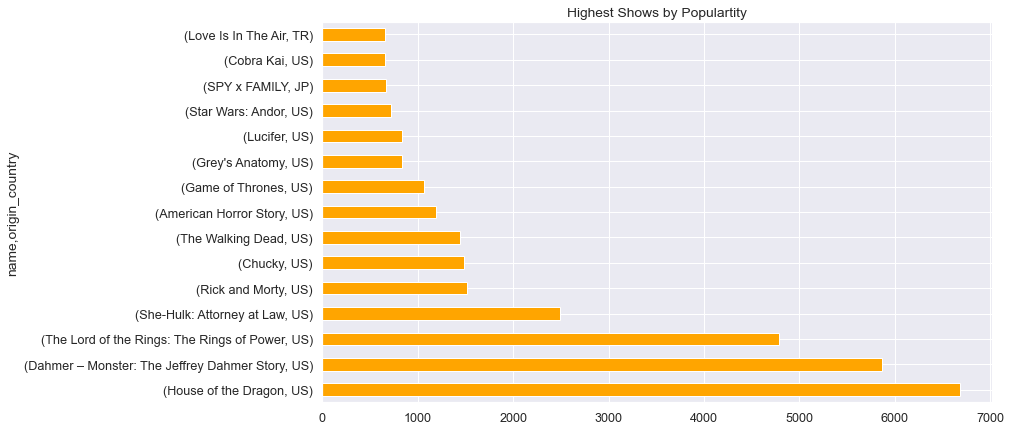

In [1760]:
Max_Pop = TV_df.groupby(['name', 'origin_country'])['popularity'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='orange')
plt.title('Highest Shows by Populartity')


#### 3 Bar Graph of The Lowest Shows by Populartity.

Text(0.5, 1.0, 'Lowest Shows by Populartity')

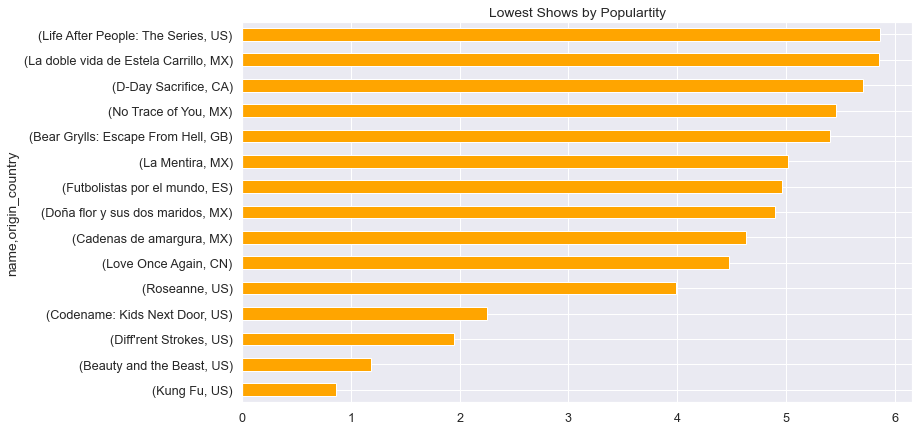

In [1761]:
Min_Pop = TV_df.groupby(['name', 'origin_country'])['popularity'].min().sort_values(ascending=True).head(15)
Min_Pop.plot.barh(color='orange')
plt.title('Lowest Shows by Populartity')



##### 4 Bar Graph of Highest Country Average by Populartity

Text(0.5, 1.0, 'Highest Country Average by Populartity')

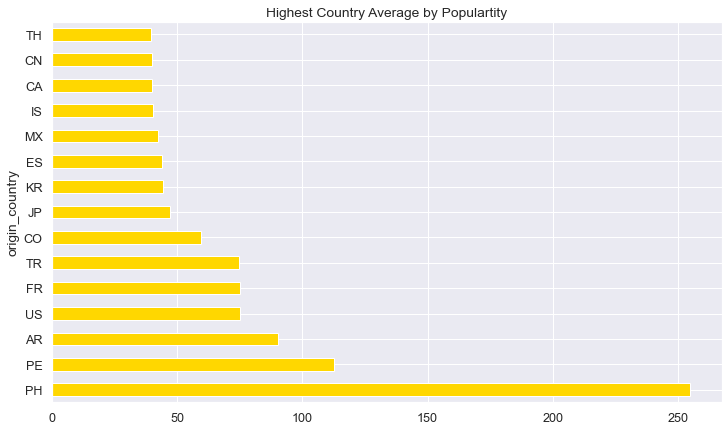

In [1762]:
Max_Pop = TV_df.groupby(['origin_country'])['popularity'].mean().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Average by Populartity')

##### 4 Bar Graph of Highest Country Max Rated by Populartity

Text(0.5, 1.0, 'Highest Country Max Rated by Populartity')

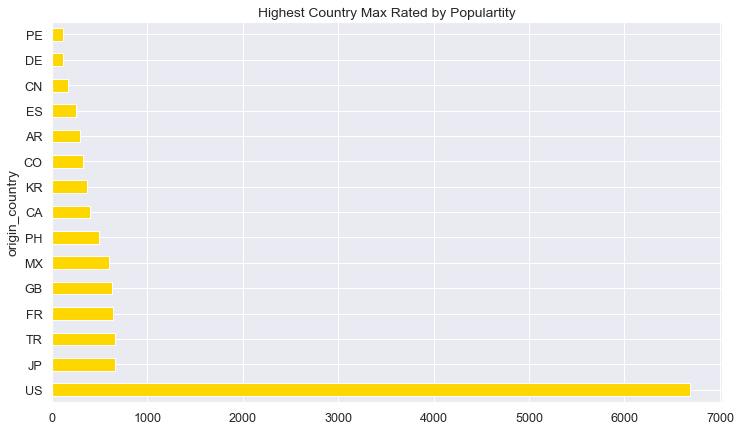

In [1763]:
Max_Pop = TV_df.groupby(['origin_country'])['popularity'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Max Rated by Populartity')

##### 5 Bar Graph of Highest Shows by Vote-Average

Text(0.5, 1.0, 'Highest Shows by Vote-Average ')

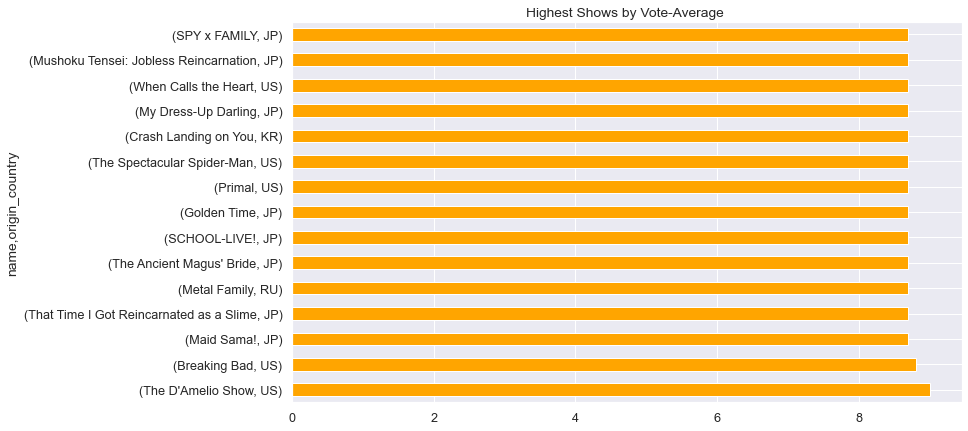

In [1764]:
Max_Pop = TV_df.groupby(['name', 'origin_country'])['vote_average'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='orange')
plt.title('Highest Shows by Vote-Average ')

##### 5 Bar Graph of The Lowest Shows by Vote-Average

Text(0.5, 1.0, 'Lowest Shows byVote-Average')

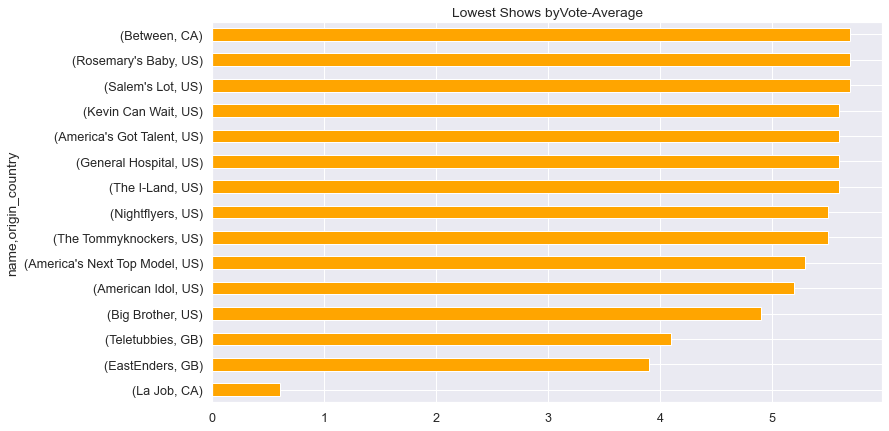

In [1765]:
Max_Pop = TV_df.groupby(['name', 'origin_country'])['vote_average'].min().sort_values(ascending=True).head(15)
Max_Pop.plot.barh(color='orange')
plt.title('Lowest Shows by Vote-Average')

##### 6 Bar Graph of The Highest Country Average by Vote-Average

Text(0.5, 1.0, 'Highest Country Average by Vote-Average')

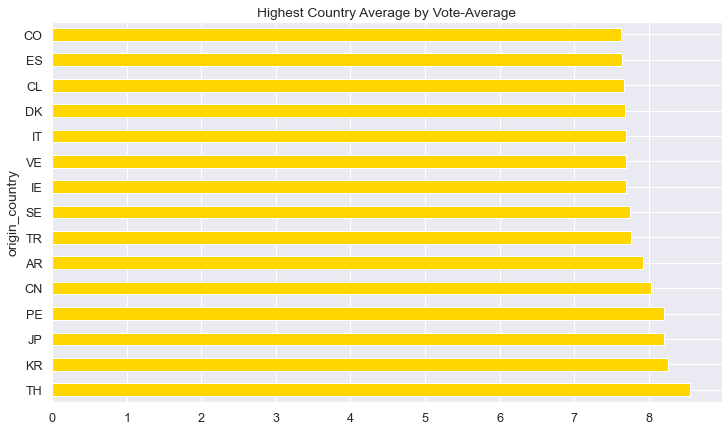

In [1766]:
Max_Pop = TV_df.groupby(['origin_country'])['vote_average'].mean().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Average by Vote-Average')

##### 6 Bar Graph of The Highest Country Max by Vote-Average

Text(0.5, 1.0, 'Highest Country Max by Vote-Average')

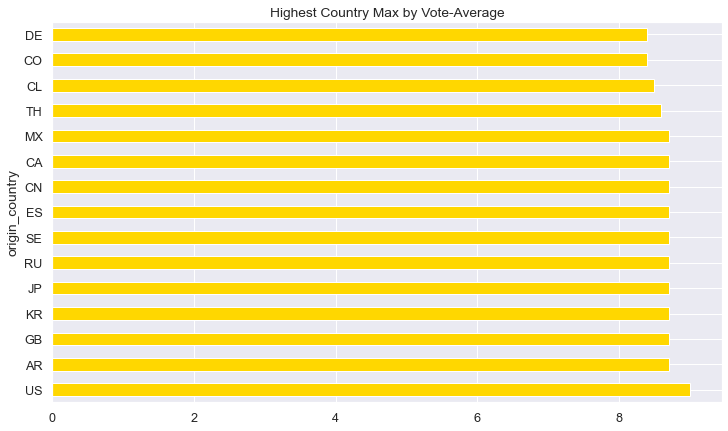

In [1738]:
Max_Pop = TV_df.groupby(['origin_country'])['vote_average'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Max by Vote-Average')

##### 7 Bar Graph of The Highest Shows by Vote-Count

Text(0.5, 1.0, 'Highest Shows by Vote-Count ')

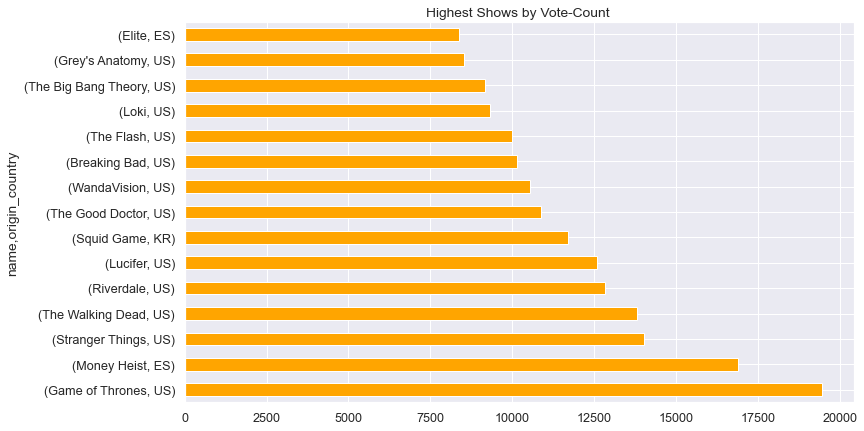

In [1739]:
Max_Pop = TV_df.groupby(['name', 'origin_country'])['vote_count'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='orange')
plt.title('Highest Shows by Vote-Count ')

##### 7 Bar Graph of The Lowest Shows by Vote-Count

Text(0.5, 1.0, 'Lowest Shows by Vote-Count')

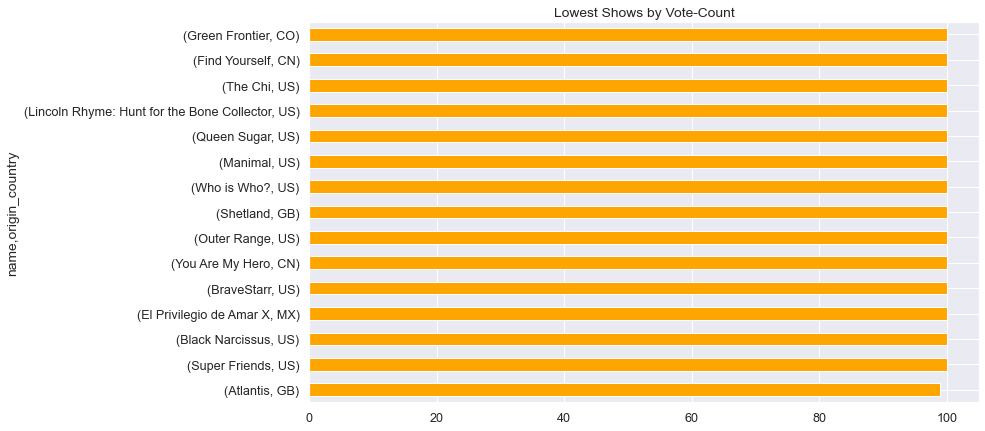

In [1740]:
Max_Pop = TV_df.groupby(['name', 'origin_country'])['vote_count'].min().sort_values(ascending=True).head(15)
Max_Pop.plot.barh(color='orange')
plt.title('Lowest Shows by Vote-Count')

##### 8 Bar Graph of The Highest Country Average by Vote-Count

Text(0.5, 1.0, 'Highest Country Average by Vote-Count')

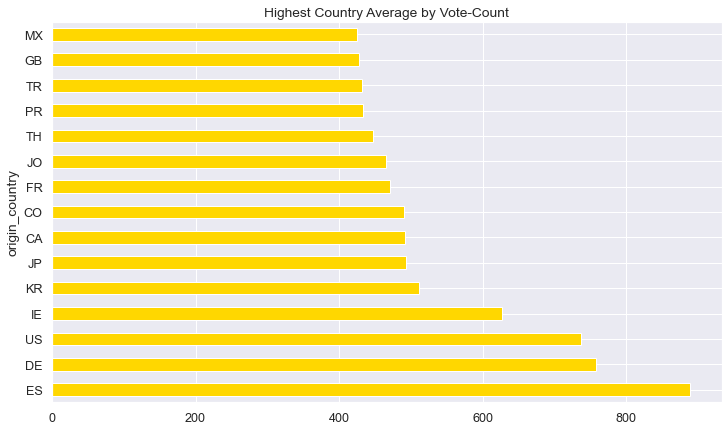

In [1741]:
Max_Pop = TV_df.groupby(['origin_country'])['vote_count'].mean().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Average by Vote-Count')

##### 8 Bar Graph of The Highest Country Max by Vote-Count

Text(0.5, 1.0, 'Highest Country Max by Vote-Count')

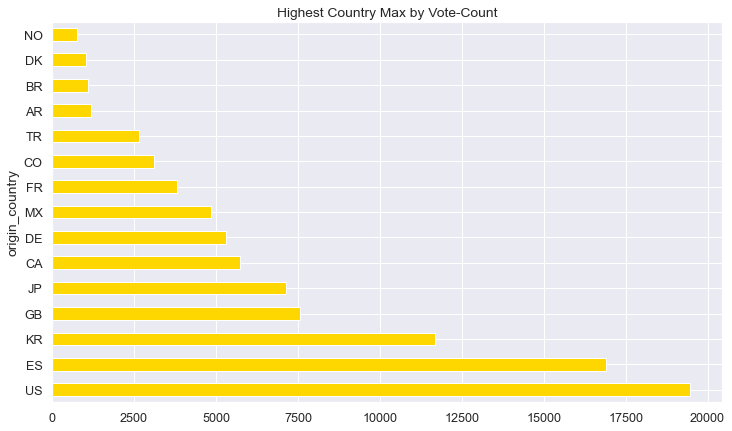

In [1742]:
Max_Pop = TV_df.groupby(['origin_country'])['vote_count'].max().sort_values(ascending=False).head(15)
Max_Pop.plot.barh(color='gold')
plt.title('Highest Country Max by Vote-Count')

##### Highest Rankings of the top 15 US TV Shows

In [1743]:
TV_df[TV_df.origin_country =='US'].groupby(['name', 'origin_country'])['vote_average'].min().sort_values(ascending=True).head(15)

name                        origin_country
Big Brother                 US                4.9
American Idol               US                5.2
America's Next Top Model    US                5.3
The Tommyknockers           US                5.5
Nightflyers                 US                5.5
General Hospital            US                5.6
The I-Land                  US                5.6
America's Got Talent        US                5.6
Kevin Can Wait              US                5.6
Rosemary's Baby             US                5.7
Salem's Lot                 US                5.7
The Cleveland Show          US                5.8
Baywatch                    US                5.8
Jimmy Kimmel Live!          US                5.8
The Bold and the Beautiful  US                5.8
Name: vote_average, dtype: float64

##### Average Rankings of US TV Shows

In [1744]:
# plt.figure(figsize=(12,6))
TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].mean()


/var/folders/pg/6p7fw10j1155dz2t00ntst440000gn/T/ipykernel_55464/3846300805.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].mean()


,vote_count,vote_average,popularity
origin_country,,,
US,737.444444,7.561583,74.957849


##### Highest Rankings of a US TV Show

In [1745]:
# plt.figure(figsize=(12,6))
TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].max()


/var/folders/pg/6p7fw10j1155dz2t00ntst440000gn/T/ipykernel_55464/139772910.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].max()


,vote_count,vote_average,popularity
origin_country,,,
US,19459,9.0,6684.611


##### Lowest Rankings of a US TV Show

In [1746]:
# plt.figure(figsize=(12,6))
TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].min()


/var/folders/pg/6p7fw10j1155dz2t00ntst440000gn/T/ipykernel_55464/1963302256.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TV_df[TV_df.origin_country =='US'].groupby('origin_country')['vote_count','vote_average','popularity'].min()


,vote_count,vote_average,popularity
origin_country,,,
US,100,4.9,0.866


#### The Amount of Movies the US Produced For Each Year.

In [1747]:
TV_df[TV_df.origin_country =='US'].groupby('Year')['name'].count().sort_values(ascending=False).head(20)

Year
2020.0    122
2021.0    108
2019.0     93
2017.0     74
2018.0     70
2016.0     68
2015.0     67
2014.0     65
2013.0     48
2012.0     41
2011.0     41
2009.0     41
2010.0     39
2022.0     37
2005.0     30
2003.0     29
2008.0     25
2007.0     24
2004.0     23
2001.0     20
Name: name, dtype: int64